In [101]:
"""
Regression with Stock history data -- yahoo stock dataset -- 3228 data rows
Prodict APPLE stock price with the follwing sector index

XAX    NYSE AMEX COMPOSITE INDEX
IXIC   NASDAQ Composite
NYA    NYSE COMPOSITE
GSPC   S&P 500
NDXT   NASDAQ-100 Technology Sector Index	
NDXX   NASDAQ-100 Ex-Tech Sector Index
IXCO   NASDAQ Computer
IXTC   NASDAQ Telecommunications
SOX    PHLX Semiconductor

"""

'\nRegression with Stock history data -- yahoo stock dataset -- 3228 data rows\nProdict APPLE stock price with the follwing sector index\n\nXAX    NYSE AMEX COMPOSITE INDEX\nIXIC   NASDAQ Composite\nNYA    NYSE COMPOSITE\nGSPC   S&P 500\nNDXT   NASDAQ-100 Technology Sector Index\t\nNDXX   NASDAQ-100 Ex-Tech Sector Index\nIXCO   NASDAQ Computer\nIXTC   NASDAQ Telecommunications\nSOX    PHLX Semiconductor\n\n'

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib import pyplot as plt
from matplotlib import cm as cm
%matplotlib inline

In [103]:
start_date = "2006-02-22"
stock_list = ["AAPL", "IXIC", "NYA", "GSPC", "XAX", "SOX", "IXTC", "IXCO", "NDXT", "NDXX"]


In [104]:
def read_write_file(filename, output_file):
    line_count = 0
    file_read = open(filename,"r")
#    line =  file_read.readline()
    file_write = open(output_file,"w")
    for line in iter(file_read):
        line_no_newline = line.rstrip()
        line_split = line_no_newline.split(",")
        if line_split[0] >= start_date:
            line_count += 1
            file_write.write(line)
    file_read.close()
    file_write.close()
    return

In [105]:
# read all stock history data
df_list = []
for input_stock_symbol  in stock_list:
    inputfile  = input_stock_symbol + ".csv"
    outputfile  = "fixed_" + input_stock_symbol + ".csv"
    read_write_file(".\\Data\\" + inputfile, ".\\Data\\" + outputfile )
    df_name =  "df_" + input_stock_symbol.lower()

    df_name = pd.read_csv(".\\Data\\" + outputfile) # deleted 6 rows with ? unknown data
    df_list.append(df_name)
    print("Stock Symbol: ", input_stock_symbol)
    print("Dataframe shape: ",df_name.shape,"\n") # 392 rows + header
    print(df_name.head())
    print("")
    print(df_name.describe())
    print("")


Stock Symbol:  AAPL
Dataframe shape:  (3228, 7) 

         Date       Open       High        Low      Close  Adj Close  \
0  2006-02-22   9.857142  10.238571   9.714286  10.188571   6.822909   
1  2006-02-23  10.255714  10.428572  10.204286  10.250000   6.864043   
2  2006-02-24  10.305715  10.412857  10.171429  10.208571   6.836300   
3  2006-02-27  10.284286  10.302857  10.092857  10.141429   6.791339   
4  2006-02-28  10.225715  10.342857   9.728572   9.784286   6.552172   

      Volume  
0  244559700  
1  214229400  
2  133686000  
3  197810200  
4  316745100  

              Open         High          Low        Close    Adj Close  \
count  3228.000000  3228.000000  3228.000000  3228.000000  3228.000000   
mean     74.650619    75.333597    73.914648    74.638978    65.571068   
std      54.194092    54.618077    53.772153    54.200844    56.022541   
min       7.390000     7.555714     7.165714     7.238572     4.847402   
25%      25.037858    25.392857    24.567857    24.96821

         Date         Open         High         Low        Close    Adj Close  \
0  2006-02-22   987.039978   997.940002  982.719971   995.059998   995.059998   
1  2006-02-23   994.169983  1001.719971  991.140015   994.270020   994.270020   
2  2006-02-24   993.210022   996.780029  990.619995   994.460022   994.460022   
3  2006-02-27   997.799988  1008.419983  997.799988  1004.140015  1004.140015   
4  2006-02-28  1002.669983  1009.109985  989.859985   991.200012   991.200012   

   Volume  
0       0  
1       0  
2       0  
3       0  
4       0  

              Open         High          Low        Close    Adj Close  Volume
count  3228.000000  3228.000000  3228.000000  3228.000000  3228.000000  3228.0
mean   1948.797850  1961.743711  1934.983449  1949.115841  1949.115841     0.0
std    1057.893441  1063.565150  1051.534036  1057.948043  1057.948043     0.0
min     596.450012   613.739990   582.760010   586.380005   586.380005     0.0
25%    1118.944977  1127.444977  1110.869965 

In [106]:
# Onley keep Adj Close data
df_list_2 = []
for df_name in df_list:
    df_name = df_name.drop("Open",axis=1)
    df_name = df_name.drop("High",axis=1)
    df_name = df_name.drop("Low",axis=1)
    df_name = df_name.drop("Close",axis=1)
    df_name = df_name.drop("Volume",axis=1)
    df_list_2.append(df_name)
    print(df_name.shape)    

(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3228, 2)
(3230, 2)


In [107]:
print(df_list_2[0].head())
print(df_list_2[1].head())

         Date  Adj Close
0  2006-02-22   6.822909
1  2006-02-23   6.864043
2  2006-02-24   6.836300
3  2006-02-27   6.791339
4  2006-02-28   6.552172
         Date    Adj Close
0  2006-02-22  2283.169922
1  2006-02-23  2279.320068
2  2006-02-24  2287.040039
3  2006-02-27  2307.179932
4  2006-02-28  2281.389893


In [108]:
# merge all history data to one data frame
df_merged =  df_list_2[0]["Adj Close"]
for i in range(1, len(df_list_2)):
    df_merged = pd.concat([df_merged, df_list_2[i]["Adj Close"]], axis=1)
df_merged.columns= stock_list    

In [109]:
# Normalizing
float_array = df_merged.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
print (scaled_array)   
print("")

[[0.00872513 0.14830032 0.41462231 ... 0.09557352 0.12266444 0.17529349]
 [0.00890681 0.14773756 0.41245027 ... 0.09538877 0.12170995 0.17433453]
 [0.00878428 0.14886604 0.41439168 ... 0.09543321 0.12243527 0.17613258]
 ...
 [0.70265713 0.80179066 0.77632936 ... 0.79016997 0.81303662 0.84780286]
 [       nan        nan        nan ...        nan        nan 0.84304668]
 [       nan        nan        nan ...        nan        nan 0.8259361 ]]



In [110]:
# Normalizing
float_array = df_merged.values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
scaled_array = min_max_scaler.fit_transform(float_array)
df_name_normalized = pd.DataFrame(scaled_array)
df_name_normalized.columns= stock_list   
print ("")
print("Dataframe shape: ",df_name_normalized.shape,"\n") # 392 rows, 7 columns + header
print(df_name_normalized[0:10])
print ("")
print(df_name_normalized[-10:])
print ("")


Dataframe shape:  (3230, 10) 

       AAPL      IXIC       NYA      GSPC       XAX       SOX      IXTC  \
0  0.008725  0.148300  0.414622  0.273327  0.403572  0.281868  0.297827   
1  0.008907  0.147738  0.412450  0.271163  0.400582  0.276927  0.293860   
2  0.008784  0.148866  0.414392  0.271890  0.407557  0.276982  0.300423   
3  0.008586  0.151810  0.415841  0.273971  0.406961  0.279209  0.305762   
4  0.007529  0.148040  0.407440  0.268000  0.411549  0.275916  0.302758   
5  0.007787  0.152900  0.414880  0.272693  0.430094  0.293700  0.324892   
6  0.008003  0.152385  0.414445  0.271761  0.435446  0.294030  0.324151   
7  0.007204  0.151141  0.413741  0.270914  0.441526  0.287357  0.328229   
8  0.006258  0.148718  0.408166  0.266935  0.437129  0.280135  0.329527   
9  0.006608  0.146138  0.402844  0.265879  0.426687  0.268271  0.324188   

       IXCO      NDXT      NDXX  
0  0.095574  0.122664  0.175293  
1  0.095389  0.121710  0.174335  
2  0.095433  0.122435  0.176133  
3  0.0

c:\users\william chang\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020634B00>,
      dtype=object)

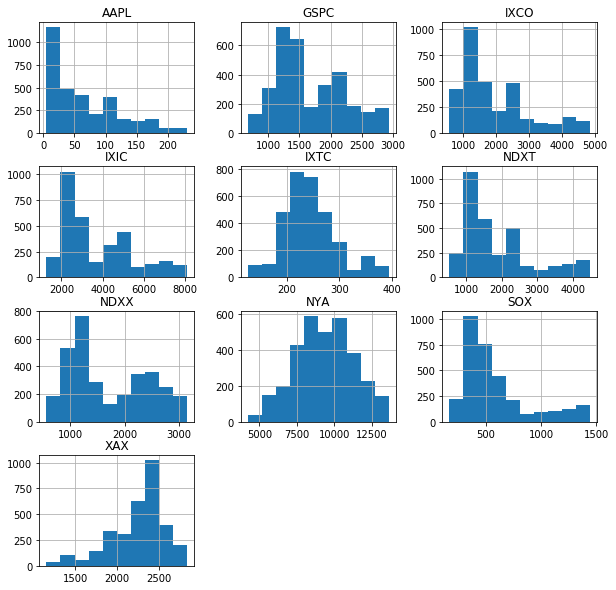

In [111]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_merged.hist(ax = ax)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000020583160>,
      dtype=object)

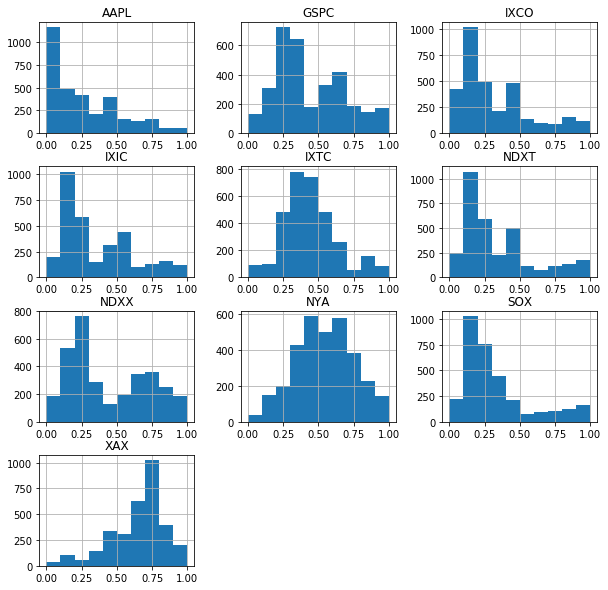

In [112]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
df_name_normalized.hist(ax = ax)

In [113]:
def correlation_matrix(df):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
#    labels = ["m","mpg","cylinders","displacement","horsepower","weight","acceleration","year"]
    labels = stock_list
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
#    cax = ax1.imshow(df.corr(), interpolation="none", cmap=cmap)
    ax1.grid(True)
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    ax1.set_xticks(np.arange(len(labels)))
    ax1.set_yticks(np.arange(len(labels)))
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.50,.75,.8,.85,.90,.95,1])
    plt.show()

In [114]:
df_merged.corr()

,AAPL,IXIC,NYA,GSPC,XAX,SOX,IXTC,IXCO,NDXT,NDXX
AAPL,1.000000,0.982364,0.839587,0.947259,0.666619,0.926646,0.834593,0.986379,0.974202,0.961134
IXIC,0.982364,1.000000,0.909428,0.985757,0.709594,0.960351,0.894921,0.993803,0.989767,0.981643
NYA,0.839587,0.909428,1.000000,0.961857,0.837928,0.889449,0.926779,0.875040,0.881173,0.915925
GSPC,0.947259,0.985757,0.961857,1.000000,0.758511,0.951530,0.916676,0.966704,0.965317,0.978752
XAX,0.666619,0.709594,0.837928,0.758511,1.000000,0.645709,0.710600,0.684913,0.681814,0.740822
SOX,0.926646,0.960351,0.889449,0.951530,0.645709,1.000000,0.922880,0.967724,0.979583,0.902227
IXTC,0.834593,0.894921,0.926779,0.916676,0.710600,0.922880,1.000000,0.885371,0.898904,0.852918
IXCO,0.986379,0.993803,0.875040,0.966704,0.684913,0.967724,0.885371,1.000000,0.996244,0.958929
NDXT,0.974202,0.989767,0.881173,0.965317,0.681814,0.979583,0.898904,0.996244,1.000000,0.951481
NDXX,0.961134,0.981643,0.915925,0.978752,0.740822,0.902227,0.852918,0.958929,0.951481,1.000000


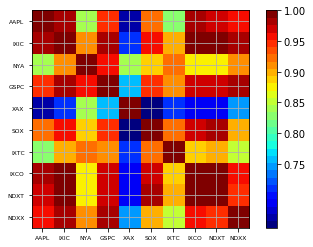

In [115]:
correlation_matrix(df_merged) # original data


In [116]:
df_name_normalized.corr()

,AAPL,IXIC,NYA,GSPC,XAX,SOX,IXTC,IXCO,NDXT,NDXX
AAPL,1.000000,0.982364,0.839587,0.947259,0.666619,0.926646,0.834593,0.986379,0.974202,0.961134
IXIC,0.982364,1.000000,0.909428,0.985757,0.709594,0.960351,0.894921,0.993803,0.989767,0.981643
NYA,0.839587,0.909428,1.000000,0.961857,0.837928,0.889449,0.926779,0.875040,0.881173,0.915925
GSPC,0.947259,0.985757,0.961857,1.000000,0.758511,0.951530,0.916676,0.966704,0.965317,0.978752
XAX,0.666619,0.709594,0.837928,0.758511,1.000000,0.645709,0.710600,0.684913,0.681814,0.740822
SOX,0.926646,0.960351,0.889449,0.951530,0.645709,1.000000,0.922880,0.967724,0.979583,0.902227
IXTC,0.834593,0.894921,0.926779,0.916676,0.710600,0.922880,1.000000,0.885371,0.898904,0.852918
IXCO,0.986379,0.993803,0.875040,0.966704,0.684913,0.967724,0.885371,1.000000,0.996244,0.958929
NDXT,0.974202,0.989767,0.881173,0.965317,0.681814,0.979583,0.898904,0.996244,1.000000,0.951481
NDXX,0.961134,0.981643,0.915925,0.978752,0.740822,0.902227,0.852918,0.958929,0.951481,1.000000


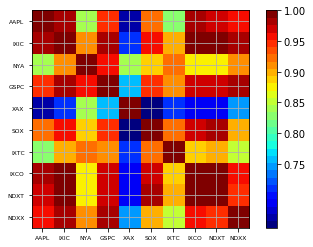

In [117]:
correlation_matrix(df_name_normalized) # normalized data

In [118]:
X = df_name_normalized.drop(stock_list[0],axis=1)
X.fillna(method='ffill', inplace=True)

y = df_name_normalized[stock_list[0]]
y.fillna(method='ffill', inplace=True)

In [119]:
X.tail()

,IXIC,NYA,GSPC,XAX,SOX,IXTC,IXCO,NDXT,NDXX
3225,0.848070,0.819263,0.875695,0.733675,0.802842,0.931522,0.834199,0.854941,0.888799
3226,0.824730,0.800053,0.853253,0.708108,0.789489,0.894706,0.811772,0.834091,0.867493
3227,0.801791,0.776329,0.829293,0.692875,0.777635,0.854775,0.790170,0.813037,0.847803
3228,0.801791,0.776329,0.829293,0.692875,0.777635,0.854775,0.790170,0.813037,0.843047
3229,0.801791,0.776329,0.829293,0.692875,0.777635,0.854775,0.790170,0.813037,0.825936


In [120]:
y.head()

0    0.008725
1    0.008907
2    0.008784
3    0.008586
4    0.007529
Name: AAPL, dtype: float64

In [121]:
# Split data to training and test
from sklearn.model_selection import train_test_split
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=2)
print("X_train shape: ",X_train.shape) # 294 rows, 6 columns
print("y_train shape: ",y_train.shape) # 294 rows, 1 column
print("X_test shape: ",X_test.shape) # 98 rows, 6 columns
print("y_test shape: ",y_test.shape) # 98 rows, 1 column
#print(X_train)
#X_test.isnull().sum()

X_train shape:  (2422, 9)
y_train shape:  (2422,)
X_test shape:  (808, 9)
y_test shape:  (808,)


In [122]:
# Training models in Python dictionary
import math
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoLars
from sklearn.linear_model import BayesianRidge

# Next line is "dictionary" data structure from class 1
d_models = {"Linear_Regression": LinearRegression(),
            "Ridge": Ridge(alpha=0.5),
            "Lasso": Lasso(alpha=0.1),
            "LassoLars": LassoLars(alpha=0.1),
            "BayesianRidge": BayesianRidge()}
models_list = d_models.keys()
print(models_list)

dict_keys(['Linear_Regression', 'Ridge', 'Lasso', 'LassoLars', 'BayesianRidge'])


In [123]:
for regression_model in models_list:
#    print (regression_model)
    regressor = d_models[regression_model]
    regressor.fit(X_train,y_train)
    y_predict = regressor.predict(X_test)
    regression_model_mse = mean_squared_error(y_predict, y_test)
    print(regression_model," ",math.sqrt(regression_model_mse))

Linear_Regression   0.026700635453693854
Ridge   0.02889602390536627
Lasso   0.25002424470231044
LassoLars   0.25002424470231044
BayesianRidge   0.026711845282105007


In [124]:
# Training model
from sklearn.linear_model import BayesianRidge
lm = BayesianRidge()
lm.fit(X_train, y_train)
print(lm.intercept_)
print(lm.coef_)
print ("Number of coefficients is ",len(lm.coef_))

-0.005065953598085593
[ 0.01839341 -0.13561446 -0.24417058  0.01354746  0.08676856 -0.01208378
  1.66086687 -0.8391363   0.38167914]
Number of coefficients is  9


In [125]:
import math
from sklearn.metrics import mean_squared_error
y_predict = lm.predict(X_test)
regression_model_mse = mean_squared_error(y_predict, y_test)
print(math.sqrt(regression_model_mse))

0.026711845282105007


In [126]:
# pick a day data for verification
first_test = np.array(df_merged.loc[[2400]])

print("Starting predict request:",first_test)


Starting predict request: [[  104.241173  4733.5      10049.290039  1951.130005  2177.22998
    608.580017   250.449997  2366.199951  2152.790039  2360.459961]]


In [127]:
first_test_transform = min_max_scaler.transform(first_test) # apply the same transform
print("Normalized new test row :",first_test_transform)

Normalized new test row : [[0.438988   0.50648073 0.618761   0.56542839 0.60845726 0.34310473
  0.46559394 0.416227   0.40972181 0.6958184 ]]


In [128]:
test_1 = list(first_test_transform[0][1:]) # Extract all values excluding mpg
test_seq = [test_1] # make a list of list

In [129]:
test_result = lm.predict(test_seq) # apply model prediction
print("Test result MPG (still normalized): ",test_result[0]) # this is still normalized mpg result

Test result MPG (still normalized):  0.427728218619983


In [130]:
first_test_transform[0][0] = test_result[0] # put result back, replace dummy with predicted
print("Test row with predicted (still normalized): ",first_test_transform)

Test row with predicted (still normalized):  [[0.42772822 0.50648073 0.618761   0.56542839 0.60845726 0.34310473
  0.46559394 0.416227   0.40972181 0.6958184 ]]


In [131]:
result = min_max_scaler.inverse_transform(first_test_transform) # apply inverse transform
print("Final test result: ",result)
print("Real Price   ", stock_list[0], " : ",first_test[0][0])
print("Predicted    ", stock_list[0], " : ",result[0][0])

Final test result:  [[  101.69178175  4733.5        10049.290039    1951.130005
   2177.22998      608.580017     250.449997    2366.199951
   2152.790039    2360.459961  ]]
Real Price    AAPL  :  104.241173
Predicted     AAPL  :  101.6917817513143


In [132]:
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[0.06130023 0.04613547 0.05782203 0.03387607 0.05660535 0.0422608
  0.0609266  0.0618148  0.06652131]
 [0.04613547 0.0419826  0.04668928 0.03311884 0.04338232 0.03620327
  0.04439591 0.04553729 0.05135764]
 [0.05782203 0.04668928 0.05612645 0.03465319 0.05366609 0.0414161
  0.05671123 0.05768816 0.06346367]
 [0.03387607 0.03311884 0.03465319 0.03722825 0.02963568 0.02611759
  0.03269769 0.03316329 0.03910874]
 [0.05660535 0.04338232 0.05366609 0.02963568 0.0566658  0.04189945
  0.05704483 0.05882133 0.05878281]
 [0.0422608  0.03620327 0.0414161  0.02611759 0.04189945 0.03636104
  0.0418167  0.04324358 0.04451646]
 [0.0609266  0.04439591 0.05671123 0.03269769 0.05704483 0.0418167
  0.06131175 0.06222439 0.06498703]
 [0.0618148  0.04553729 0.05768816 0.03316329 0.05882133 0.04324358
  0.06222439 0.0636264  0.06568832]
 [0.06652131 0.05135764 0.06346367 0.03910874 0.05878281 0.04451646
  0.06498703 0.06568832 0.07491392]]


In [133]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [134]:
print(eigen_vectors)

[[ 0.36589887 -0.1434706  -0.18829967  0.0016477  -0.09643119 -0.28934341
   0.11521282 -0.76793955  0.33771437]
 [ 0.28848792  0.34405151  0.25051288  0.44852741  0.37420828 -0.05824503
  -0.50669159  0.06986274  0.35976137]
 [ 0.35032831  0.04145532 -0.0353676   0.29459164  0.25759104 -0.41656497
   0.20600539  0.01145928 -0.71068093]
 [ 0.21897027  0.82039359 -0.10145885 -0.49559915 -0.02887122  0.03909162
   0.1343357  -0.03347381 -0.0395687 ]
 [ 0.34252515 -0.25945212  0.38314313 -0.25701801  0.51913682  0.32710918
   0.44506028  0.06348567  0.1545693 ]
 [ 0.26317956  0.06268884  0.65856864  0.16576677 -0.66621729  0.04117495
   0.12808652  0.0140059  -0.0589253 ]
 [ 0.36242187 -0.23405855 -0.14223019 -0.31326201 -0.15784514 -0.51446461
  -0.08690646  0.57022317  0.27057041]
 [ 0.36952841 -0.2448714  -0.02238869 -0.33934179 -0.05486003  0.33859056
  -0.63570447 -0.15518388 -0.37679868]
 [ 0.39714862  0.01702532 -0.537587    0.39949328 -0.20544897  0.49982016
   0.20820089  0.22510

In [135]:
print(eigen_values[0:9])

[4.51673981e-01 2.11519281e-02 9.33773512e-03 5.02756139e-03
 1.80856609e-03 3.32145385e-04 1.15432966e-04 1.82945803e-05
 5.07967349e-05]


In [136]:
#eigen_values_real = [x.real for x in eigen_values]
print(eigen_values_real[0:9])

[0.45167398071097065, 0.021151928116810916, 0.009337735117619272, 0.005027561390050736, 0.0018085660921119168, 0.00033214538510661326, 0.00011543296606862409, 1.829458033774366e-05, 5.079673492768844e-05]


[0.9226941994053137, 0.043209842083218215, 0.019075426959614828, 0.010270464826094103, 0.0036945972398189767, 0.0006785173228590902, 0.00023581019221876747, 0.00010376921113040552, 3.737275973174201e-05]
[0.9226942  0.96590404 0.98497947 0.99524993 0.99894453 0.99962305
 0.99985886 0.99996263 1.        ]


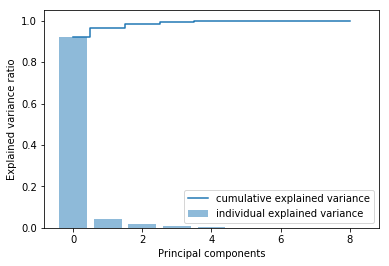

In [145]:
import matplotlib.pyplot as plt
tot = sum(eigen_values_real)
var_exp = [(i/tot) for i in sorted(eigen_values_real,reverse=True)]
# print(len(var_exp))

print(var_exp)
cum_var_exp = np.cumsum(var_exp)
print (cum_var_exp)
plt.bar(range(0,9),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(0,9),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

9
2
[0.9226941994053137, 0.043209842083218215, 0.019075426959614828, 0.010270464826094103, 0.0036945972398189767, 0.0006785173228590902, 0.00023581019221876747, 0.00010376921113040552, 3.737275973174201e-05]
[0.9226942  0.96590404]


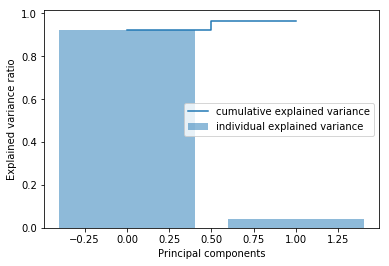

In [142]:
import matplotlib.pyplot as plt
tot = sum(eigen_values_real)
var_exp = [(i/tot) for i in sorted(eigen_values_real,reverse=True)]
var_exp_2 = var_exp[0:2]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp_2 = np.cumsum(var_exp[0:2])
print(len(var_exp))
print(len(var_exp_2))
print(var_exp)
print(cum_var_exp_2)

plt.bar(range(0,2),var_exp_2,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(0,2),cum_var_exp_2,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

9
3
[0.9226941994053137, 0.043209842083218215, 0.019075426959614828, 0.010270464826094103, 0.0036945972398189767, 0.0006785173228590902, 0.00023581019221876747, 0.00010376921113040552, 3.737275973174201e-05]
[0.9226942  0.96590404 0.98497947]


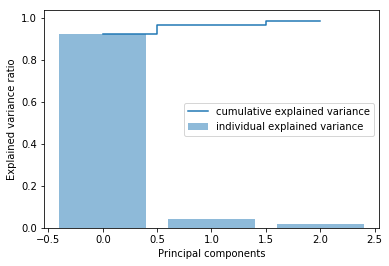

In [146]:
import matplotlib.pyplot as plt
tot = sum(eigen_values_real)
var_exp = [(i/tot) for i in sorted(eigen_values_real,reverse=True)]
var_exp_3 = var_exp[0:3]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp_3 = np.cumsum(var_exp[0:3])
print(len(var_exp))
print(len(var_exp_3))
print(var_exp)
print(cum_var_exp_3)

plt.bar(range(0,3),var_exp_3,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(0,3),cum_var_exp_3,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [149]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])

In [150]:
print(pca.explained_variance_ratio_)

[0.9226942  0.04320984 0.01907543 0.01027046]


In [151]:
print(pca.components_)

[[ 0.36589887  0.28848792  0.35032831  0.21897027  0.34252515  0.26317956
   0.36242187  0.36952841  0.39714862]
 [ 0.1434706  -0.34405151 -0.04145532 -0.82039359  0.25945212 -0.06268884
   0.23405855  0.2448714  -0.01702532]
 [-0.18829967  0.25051288 -0.0353676  -0.10145885  0.38314313  0.65856864
  -0.14223019 -0.02238869 -0.537587  ]
 [-0.0016477  -0.44852741 -0.29459164  0.49559915  0.25701801 -0.16576677
   0.31326201  0.33934179 -0.39949328]]


In [152]:
print(principalDf.head())
print(principalDf.tail())

   principal component 1  principal component 2  principal component 3  \
0              -0.544131               0.119942               0.106311   
1              -0.549914               0.121858               0.102311   
2              -0.544414               0.115359               0.105205   
3              -0.536460               0.116927               0.106242   
4              -0.547608               0.113787               0.104822   

   principal component 4  
0              -0.038442  
1              -0.038921  
2              -0.038083  
3              -0.040528  
4              -0.032766  
      principal component 1  principal component 2  principal component 3  \
3225               1.278838               0.220825               0.133034   
3226               1.212738               0.234843               0.121753   
3227               1.147773               0.242756               0.105813   
3228               1.145884               0.242837               0.108370   
3229    